### Полезные формулы для этого задания
Наше распределение - экспоненциальное. То есть $f(x) = \lambda \cdot e^{-\lambda x}$ при $x \geq 0$.

Выборочные среднее, дисперсия и медиана - несмещённые величины (тут остаётся только вопрос к выборочной дисперсии, но мы выбрали `ddof = 1` в параметрах, и дисперсия у нас несмещённая, хотя бывает и смещённый вариант). Поэтому матожидание выборочных моментов для нормального распределения просто равнялось матожиданию, дисперсии и медиане.

***
  *Матожидание*

Выб. среднего: $\mu = E[X] = \frac{1}{\lambda}$

Выб. дисперсии: $\sigma^2 = D[X] = \frac{1}{\lambda ^ 2}$

Выб. медианы: $m = \frac{\ln(2)}{\lambda}$

А вот для нахождения дисперсии выборочных моментов пришлось пострадать. После того, как мы пострадали, формулы были найдены:

***
  *Дисперсия*

Выб. среднего: $\frac{1}{\lambda^2 n}$

Выб. дисперсии: $\frac{8}{\lambda ^ 4 n}$

Выб. медианы: $\frac{1}{\lambda^2 n}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, gamma

samples = 50000
n = 2000
lambda_param = 12

means = np.zeros(samples)
variances = np.zeros(samples)
sample_medians = np.zeros(samples)
sample_vars = np.zeros(samples)
sample_means = np.zeros(samples)
nF_X2 = np.zeros(samples)
nF_Xn_minus_2 = np.zeros(samples)

F = lambda x: 1 - np.exp(-lambda_param * x)

for i in range(samples):
    generated_data = np.random.exponential(size=n, scale=1/lambda_param)
    
    sample_means[i] = np.mean(generated_data)
    sample_vars[i] = np.var(generated_data, ddof=1)
    sample_medians[i] = np.median(generated_data)

    sorted_data = np.sort(generated_data)
    nF_X2[i] = n * F(sorted_data[1])
    nF_Xn_minus_2[i] = n * (1 - F(sorted_data[n-3]))


my_mean = 1/lambda_param
my_variance = 1/(lambda_param**2)
my_median = np.log(2)/lambda_param


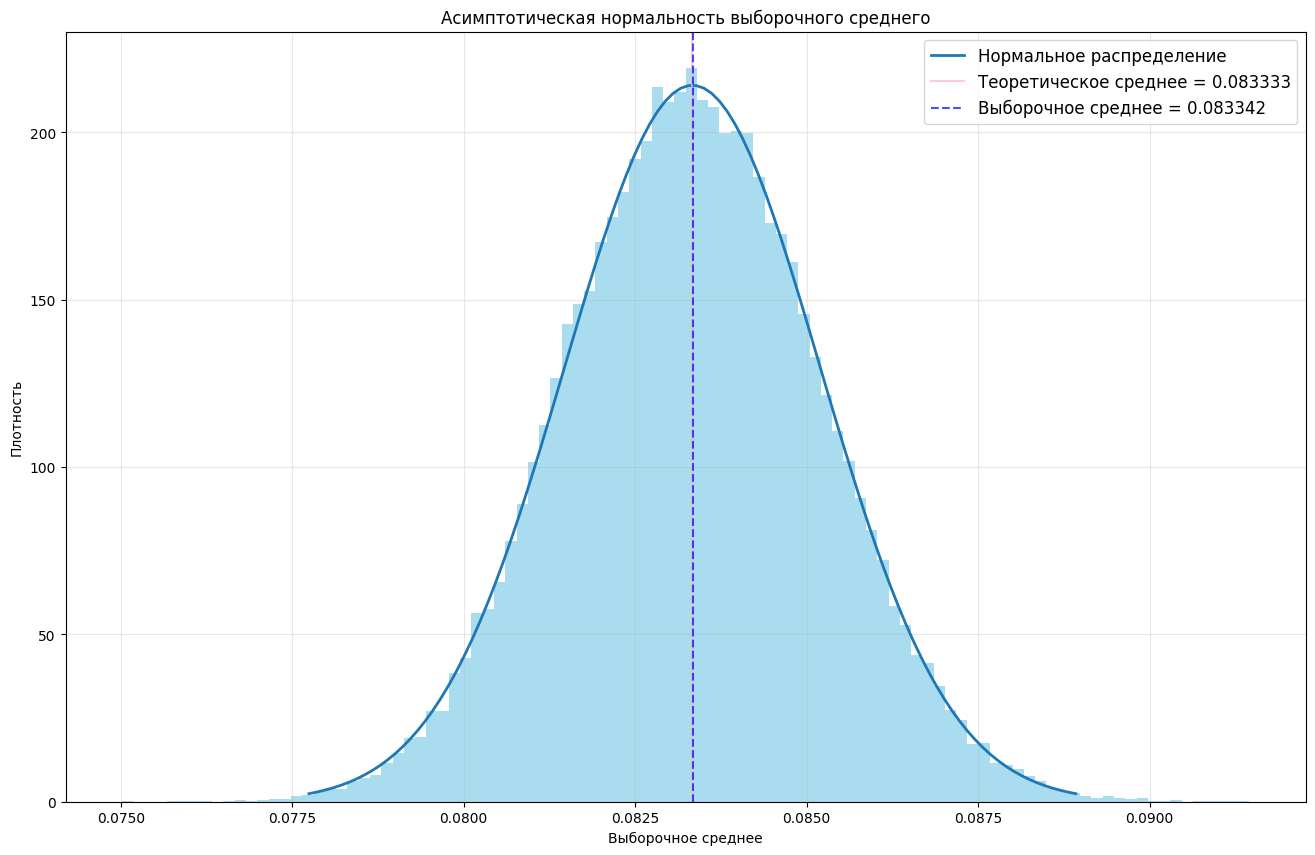

In [3]:

# Асимптотическая нормальность выборочного среднего
plt.figure(figsize=(16, 10))
plt.hist(sample_means, bins=100, density=True, alpha=0.7, color='skyblue')
x = np.linspace(my_mean - 3*np.sqrt(my_variance/n), my_mean + 3*np.sqrt(my_variance/n), 100) # правило трёх сигм
plt.plot(x, norm.pdf(x, my_mean, np.sqrt(my_variance/n)), linewidth=2, label='Нормальное распределение')

plt.axvline(my_mean, color='lightpink', alpha=0.7, label=f'Теоретическое среднее = {my_mean:.6f}')
plt.axvline(np.mean(sample_means), color='blue', linestyle='--', alpha=0.7, label=f'Выборочное среднее = {np.mean(sample_means):.6f}')
plt.title('Асимптотическая нормальность выборочного среднего')
plt.xlabel('Выборочное среднее')
plt.ylabel('Плотность')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

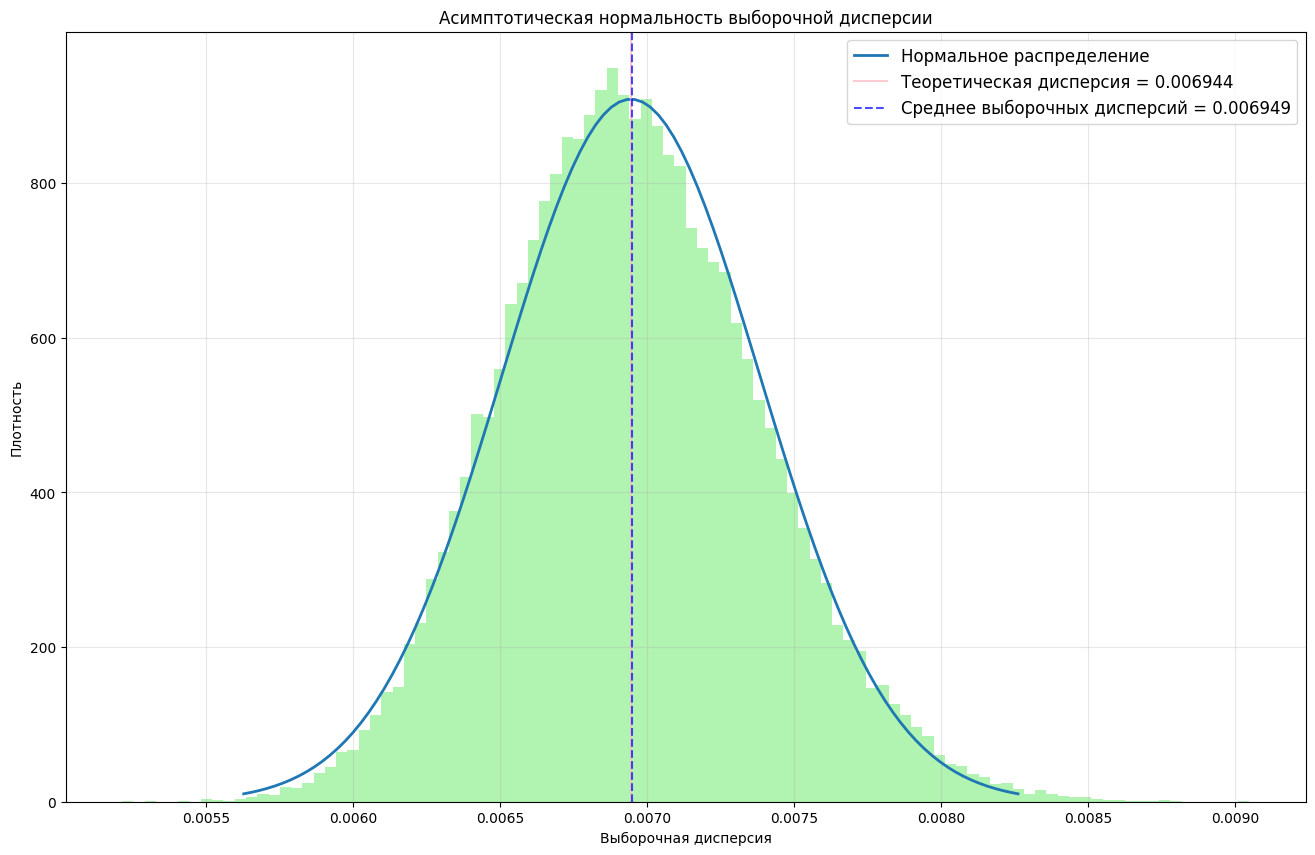

In [8]:

# Асимптотическая нормальность выборочной дисперсии
plt.figure(figsize=(16, 10))
plt.hist(sample_vars, bins=100, density=True, alpha=0.7, color='lightgreen')
x = np.linspace(0, 2*my_variance, 100)
asymptotic_var = 8 / (n * lambda_param**4) # это просто формула из интернета, её можно вывести руками
x_var = np.linspace(my_variance - 3*np.sqrt(asymptotic_var), my_variance + 3*np.sqrt(asymptotic_var), 100) # правило трёх сигм
plt.plot(x_var, norm.pdf(x_var, my_variance, np.sqrt(asymptotic_var)), linewidth=2, label='Нормальное распределение')

plt.axvline(my_variance, color='lightpink', alpha=0.7, label=f'Теоретическая дисперсия = {my_variance:.6f}')
plt.axvline(np.mean(sample_vars), color='blue', linestyle='--', alpha=0.7, label=f'Среднее выборочных дисперсий = {np.mean(sample_vars):.6f}')
plt.title('Асимптотическая нормальность выборочной дисперсии')
plt.xlabel('Выборочная дисперсия')
plt.ylabel('Плотность')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


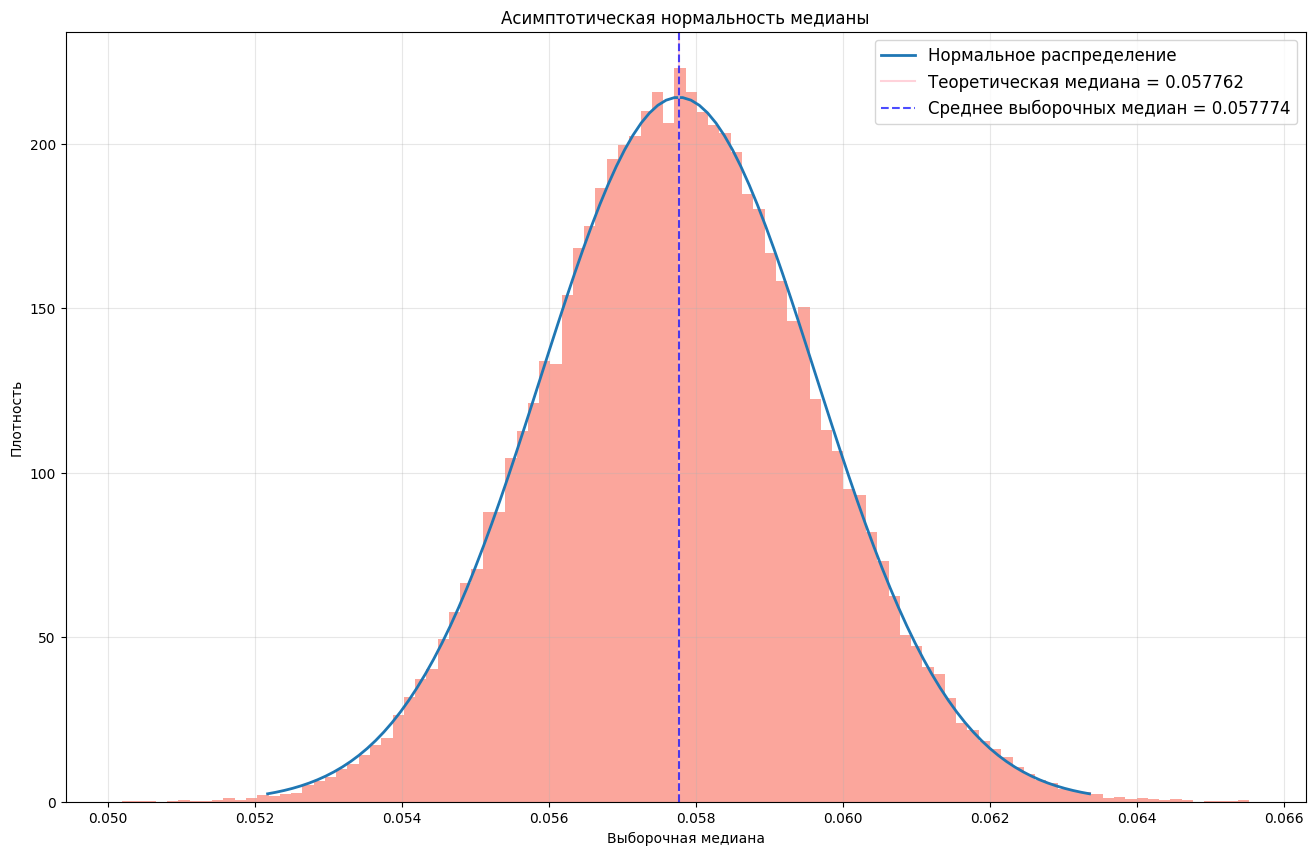

In [5]:


# Асимптотическая нормальность медианы
plt.figure(figsize=(16, 10))
plt.hist(sample_medians, bins=100, density=True, alpha=0.7, color='salmon')
f_m = lambda_param / 2
asymptotic_median = 1 / (n * lambda_param**2) # это вообще нереальное что-то, как это люди выводили !???
x = np.linspace(my_median - 3*np.sqrt(asymptotic_median), my_median + 3*np.sqrt(asymptotic_median), 100) # правило трёх сигм
plt.plot(x, norm.pdf(x, my_median, np.sqrt(asymptotic_median)), linewidth=2, label='Нормальное распределение')

plt.axvline(my_median, color='pink', alpha=0.7, label=f'Теоретическая медиана = {my_median:.6f}')
plt.axvline(np.mean(sample_medians), color='blue', linestyle='--', alpha=0.7, label=f'Среднее выборочных медиан = {np.mean(sample_medians):.6f}')
plt.title('Асимптотическая нормальность медианы')
plt.xlabel('Выборочная медиана')
plt.ylabel('Плотность')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


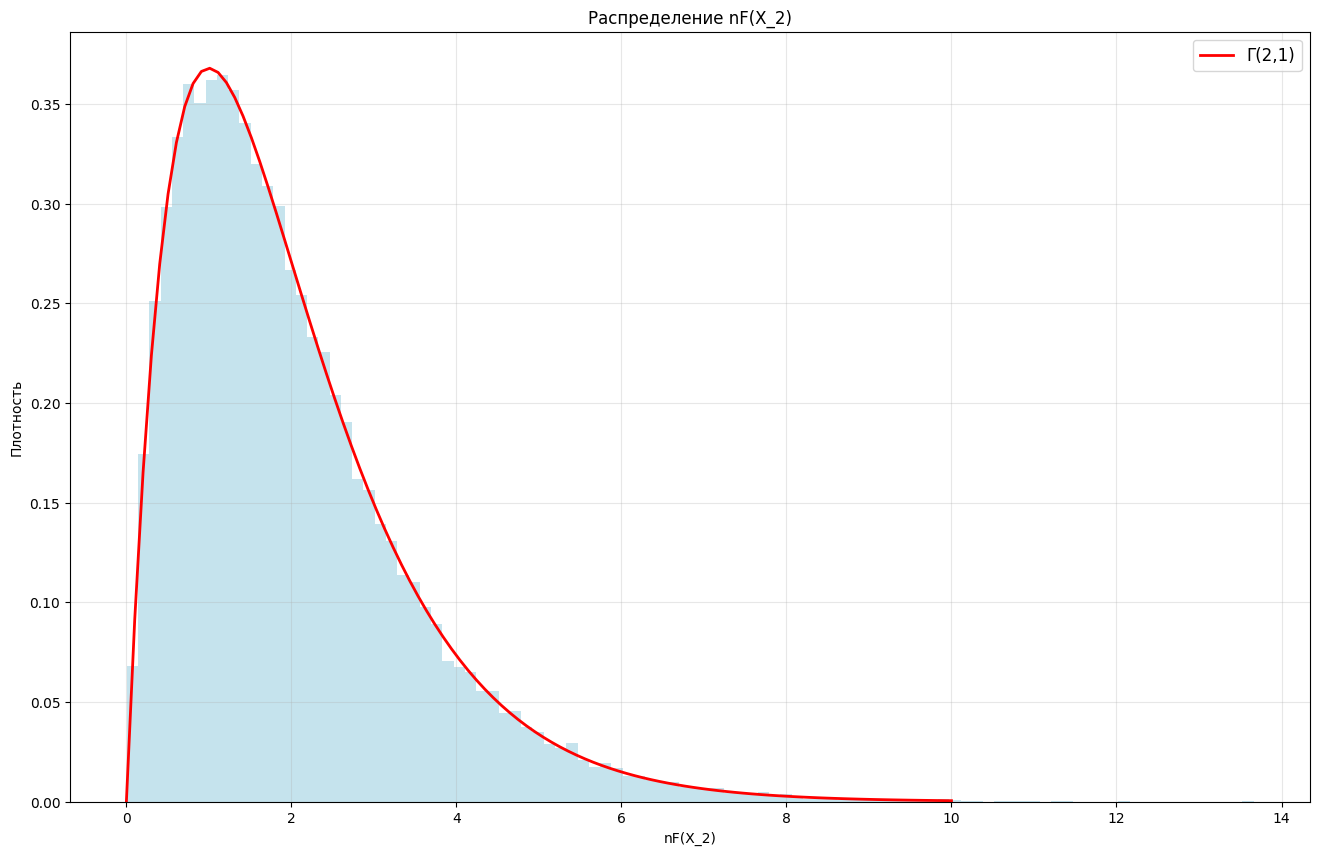

In [6]:

# Распределение nF(x_2) (теоретическое гамма-распределение Γ(2,1))
plt.figure(figsize=(16, 10))
plt.hist(nF_X2, bins=100, density=True, alpha=0.7, color='lightblue')

x_gamma1 = np.linspace(0, 10, 100)
plt.plot(x_gamma1, gamma.pdf(x_gamma1, a=2, scale=1), 'red', linewidth=2, label='Γ(2,1)')
plt.title('Распределение nF(X_2)')
plt.xlabel('nF(X_2)')
plt.ylabel('Плотность')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


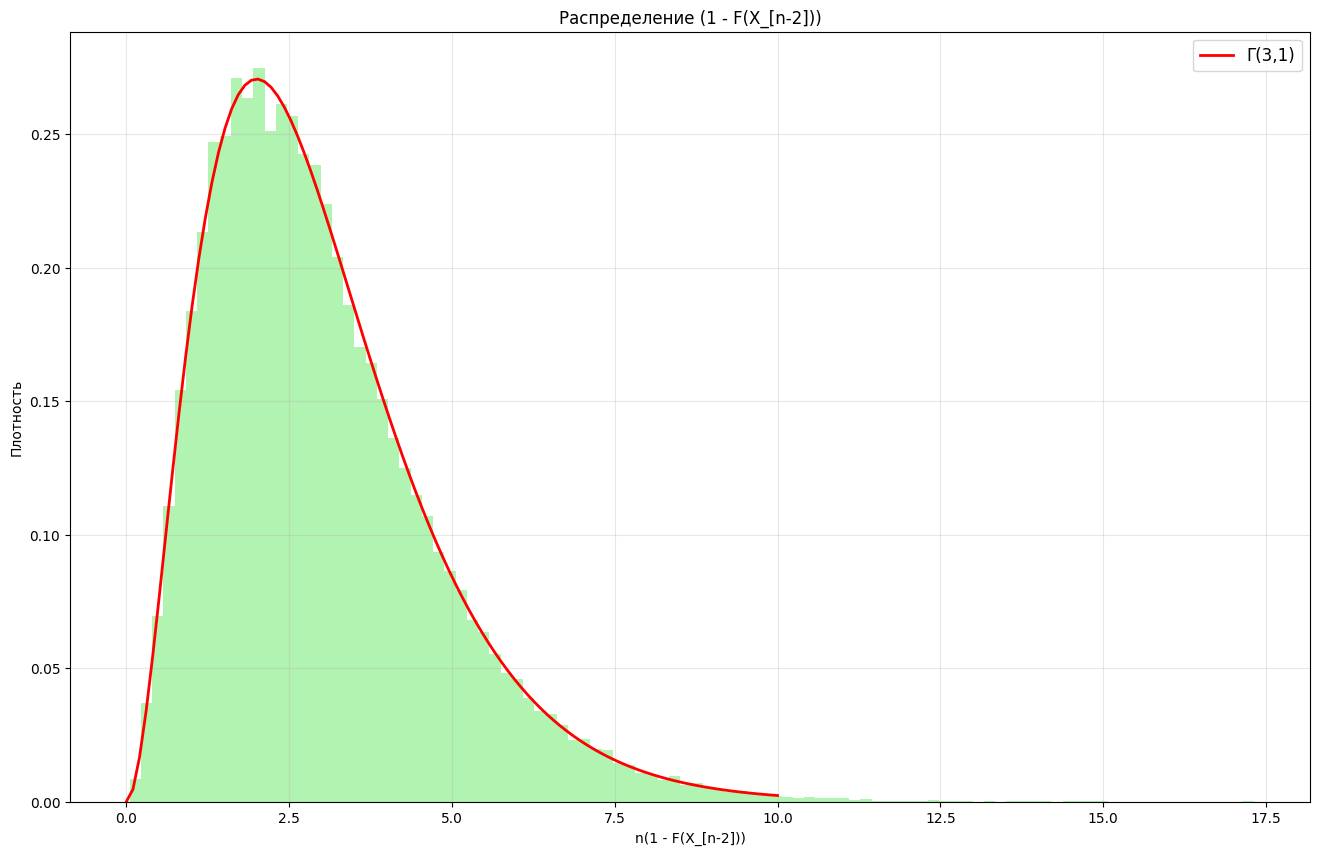

In [7]:

# Распределение nF(x_n-2) (теоретическое гамма-распределение Γ(3,1))
plt.figure(figsize=(16, 10))
plt.hist(nF_Xn_minus_2, bins=100, density=True, alpha=0.7, color='lightgreen')

x_gamma2 = np.linspace(0, 10, 100)
plt.plot(x_gamma2, gamma.pdf(x_gamma2, a=3, scale=1), 'red', linewidth=2, label=f'Γ(3,1)')
plt.title('Распределение (1 - F(X_[n-2]))')
plt.xlabel('n(1 - F(X_[n-2]))')
plt.ylabel('Плотность')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()